In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [42]:
df = pd.read_csv("../churnANN/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [44]:
df = df.drop(columns='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columnsToEncode = ['gender','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','MultipleLines','InternetService','Contract','PaymentMethod','Churn']
for column in columnsToEncode:
    df[column] = le.fit_transform(df[column])

df = df[df.TotalCharges!=' ']
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [46]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [47]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [48]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [49]:
X = df.drop('Churn',axis='columns')
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [57]:
model = keras.Sequential([
    keras.layers.Dense(3000, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
94/94 [==============================] - 2s 8ms/step - loss: 0.6197 - accuracy: 0.6742
Epoch 2/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5753 - accuracy: 0.7258
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5573 - accuracy: 0.7278
Epoch 4/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5451 - accuracy: 0.7355
Epoch 5/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5446 - accuracy: 0.7381
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5524 - accuracy: 0.7298
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5382 - accuracy: 0.7341
Epoch 8/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5271 - accuracy: 0.7475
Epoch 9/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5236 - accuracy: 0.7485
Epoch 10/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5293 - accuracy: 0.7492
Epoch 11/50
94/94 [

In [51]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.7827


[0.7074527144432068, 0.7827076315879822]

55/55 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

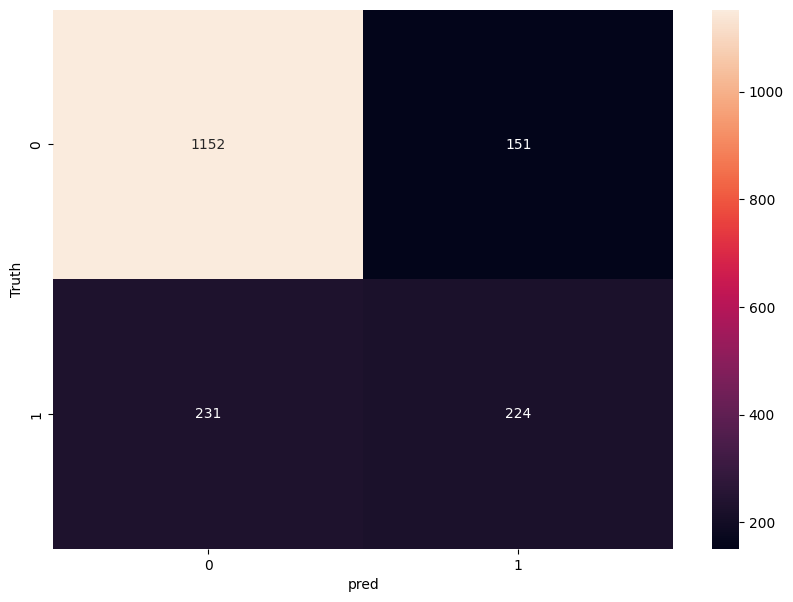

In [52]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.21729237770193402
Mean Absolute Error: 0.21729237770193402
R-squared: -0.1327300481559881
Accuracy Score: 0.782707622298066
Confusion Matrix : 
[[1152  151]
 [ 231  224]]
Full report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1303
           1       0.60      0.49      0.54       455

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



# Notice that F1 score of class 1 (churn = 0 i.e. churn = No)

### Method 1 : Undersampling

In [54]:
count_class_0, count_class_1 = df.Churn.value_counts()

df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]

In [55]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [56]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [58]:
model = keras.Sequential([
    keras.layers.Dense(3000, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
94/94 [==============================] - 2s 8ms/step - loss: 0.6228 - accuracy: 0.6572
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5689 - accuracy: 0.7204
Epoch 3/50
94/94 [==============================] - 1s 9ms/step - loss: 0.5716 - accuracy: 0.7140
Epoch 4/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5586 - accuracy: 0.7244
Epoch 5/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5539 - accuracy: 0.7214
Epoch 6/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5538 - accuracy: 0.7304
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5505 - accuracy: 0.7371
Epoch 8/50
94/94 [==============================] - 1s 7ms/step - loss: 0.5440 - accuracy: 0.7371
Epoch 9/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5363 - accuracy: 0.7355
Epoch 10/50
94/94 [==============================] - 1s 8ms/step - loss: 0.5455 - accuracy: 0.7341
Epoch 11/50
94/94 [

In [59]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7487


[0.5268625020980835, 0.7486631274223328]

24/24 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

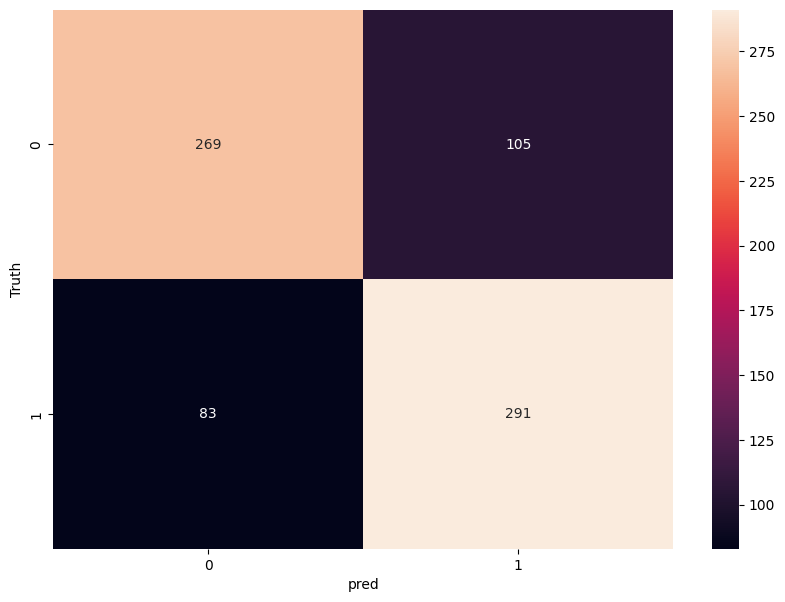

In [60]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [61]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.25133689839572193
Mean Absolute Error: 0.25133689839572193
R-squared: -0.005347593582887722
Accuracy Score: 0.7486631016042781
Confusion Matrix : 
[[269 105]
 [ 83 291]]
Full report : 
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.73      0.78      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



### Method 2: Oversampling

In [62]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [64]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [65]:
model = keras.Sequential([
    keras.layers.Dense(3000, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
259/259 [==============================] - 4s 9ms/step - loss: 0.5963 - accuracy: 0.6953
Epoch 2/50
259/259 [==============================] - 2s 8ms/step - loss: 0.5581 - accuracy: 0.7258
Epoch 3/50
259/259 [==============================] - 2s 9ms/step - loss: 0.5475 - accuracy: 0.7326
Epoch 4/50
259/259 [==============================] - 2s 8ms/step - loss: 0.5424 - accuracy: 0.7315
Epoch 5/50
259/259 [==============================] - 2s 8ms/step - loss: 0.5306 - accuracy: 0.7372
Epoch 6/50
259/259 [==============================] - 2s 7ms/step - loss: 0.5321 - accuracy: 0.7442
Epoch 7/50
259/259 [==============================] - 2s 7ms/step - loss: 0.5280 - accuracy: 0.7477
Epoch 8/50
259/259 [==============================] - 2s 8ms/step - loss: 0.5291 - accuracy: 0.7389
Epoch 9/50
259/259 [==============================] - 2s 8ms/step - loss: 0.5241 - accuracy: 0.7477
Epoch 10/50
259/259 [==============================] - 2s 7ms/step - loss: 0.5275 - accuracy: 0.7438

In [66]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.7609


[0.4603903293609619, 0.7608906030654907]

65/65 [==============================] - 0s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

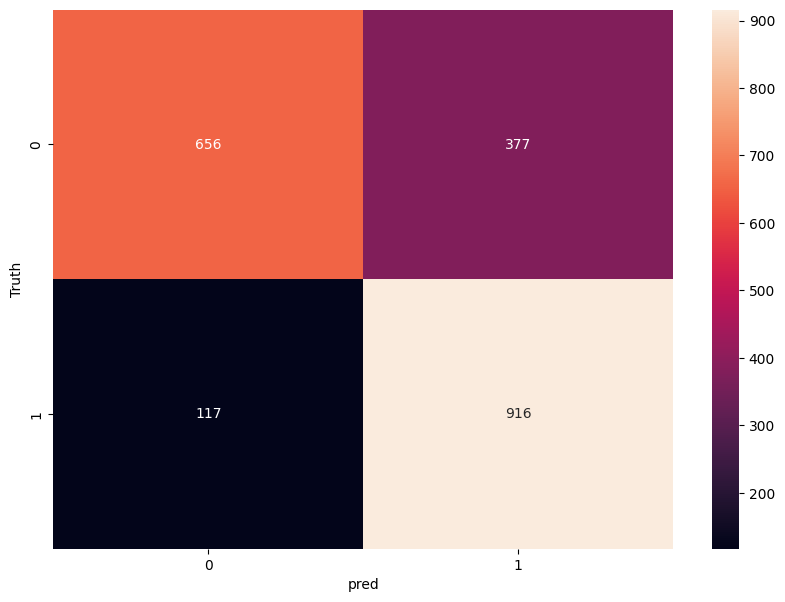

In [67]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [68]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.23910939012584706
Mean Absolute Error: 0.23910939012584706
R-squared: 0.04356243949661176
Accuracy Score: 0.7608906098741529
Confusion Matrix : 
[[656 377]
 [117 916]]
Full report : 
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1033
           1       0.71      0.89      0.79      1033

    accuracy                           0.76      2066
   macro avg       0.78      0.76      0.76      2066
weighted avg       0.78      0.76      0.76      2066



### Method 3: SMOTE

In [84]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [86]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, stratify=y_smote)
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
y_train.value_counts()

Churn
0    3872
1    3872
Name: count, dtype: int64

In [98]:
model = keras.Sequential([
    keras.layers.Dense(3000, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='leaky_relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
242/242 [==============================] - 3s 7ms/step - loss: 0.5637 - accuracy: 0.7230
Epoch 2/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5407 - accuracy: 0.7468
Epoch 3/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5157 - accuracy: 0.7486
Epoch 4/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5085 - accuracy: 0.7587
Epoch 5/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5175 - accuracy: 0.7619
Epoch 6/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5060 - accuracy: 0.7619
Epoch 7/50
242/242 [==============================] - 2s 7ms/step - loss: 0.5009 - accuracy: 0.7663
Epoch 8/50
242/242 [==============================] - 2s 7ms/step - loss: 0.4900 - accuracy: 0.7747
Epoch 9/50
242/242 [==============================] - 2s 7ms/step - loss: 0.4954 - accuracy: 0.7723
Epoch 10/50
242/242 [==============================] - 2s 7ms/step - loss: 0.4982 - accuracy: 0.7735

In [99]:
model.evaluate(X_test,y_test)

81/81 [==============================] - 2s 8ms/step - loss: 0.4321 - accuracy: 0.8056


[0.4321432411670685, 0.8055770993232727]

81/81 [==============================] - 1s 5ms/step


Text(95.72222222222221, 0.5, 'Truth')

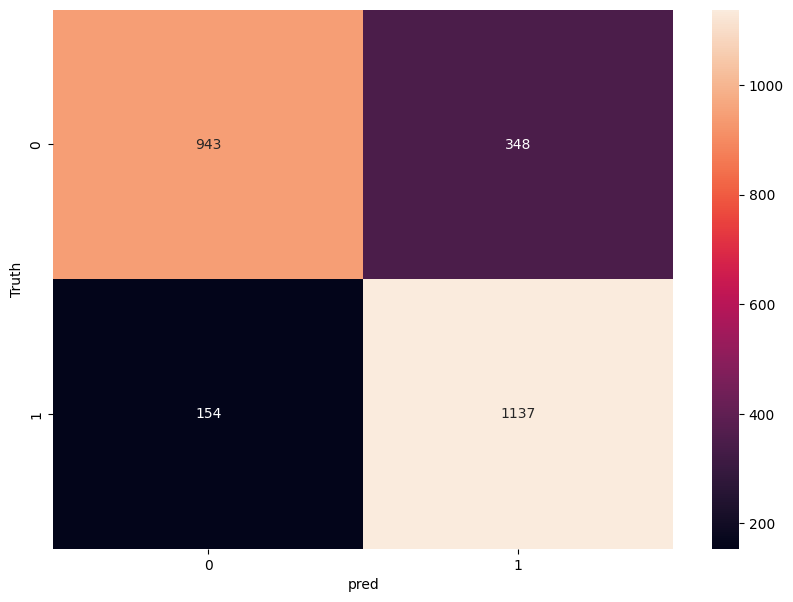

In [100]:
y_pred_prob = model.predict(X_test)
y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [101]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.19442292796281951
Mean Absolute Error: 0.19442292796281951
R-squared: 0.22230828814872194
Accuracy Score: 0.8055770720371804
Confusion Matrix : 
[[ 943  348]
 [ 154 1137]]
Full report : 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1291
           1       0.77      0.88      0.82      1291

    accuracy                           0.81      2582
   macro avg       0.81      0.81      0.80      2582
weighted avg       0.81      0.81      0.80      2582



### Method 4: Use of Ensemble with undersampling

In [188]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

df.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
# stratify=y means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
y_train.value_counts()

Churn
0    3872
1    1402
Name: count, dtype: int64

In [190]:
X_train_class0 = X_train[y_train==0]
X_train_class1 = X_train[y_train==1]
count_X_train_class0 = X_train_class0.shape[0]
count_X_train_class1 = X_train_class1.shape[0]

In [194]:
y_pred_comb = []
import math
for i in range(math.ceil(count_X_train_class0/count_X_train_class1)):
    X_train_samplei_class0 = X_train_class0.iloc[i*count_X_train_class1: (i+1)*count_X_train_class1-1]
    y_train = [0]*len(X_train_samplei_class0) + [1]*(count_X_train_class1)
    y_train = np.array(y_train)
    X_train = pd.concat([X_train_samplei_class0, X_train_class1], axis=0)
    model = keras.Sequential([
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10)

    y_pred_prob = model.predict(X_test)
    y_pred = [1 if i>0.5 else 0 for i in y_pred_prob]
    y_pred_comb.append(y_pred)

y_pred_prob = np.mean(np.array(y_pred_comb), axis=0)
y_pred = [1 if i>=0.5 else 0 for i in y_pred_prob]

Epoch 1/10
88/88 [==============================] - 2s 8ms/step - loss: 0.6700 - accuracy: 0.5751
Epoch 2/10
88/88 [==============================] - 1s 7ms/step - loss: 0.6300 - accuracy: 0.6372
Epoch 3/10
88/88 [==============================] - 1s 7ms/step - loss: 0.6185 - accuracy: 0.6811
Epoch 4/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5979 - accuracy: 0.6900
Epoch 5/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5846 - accuracy: 0.7174
Epoch 6/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5683 - accuracy: 0.7210
Epoch 7/10
88/88 [==============================] - 1s 8ms/step - loss: 0.5668 - accuracy: 0.7246
Epoch 8/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5790 - accuracy: 0.7192
Epoch 9/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5546 - accuracy: 0.7331
Epoch 10/10
55/55 [==============================] - 0s 2ms/step
Epoch 1/10
88/88 [==============================] - 1

Text(95.72222222222221, 0.5, 'Truth')

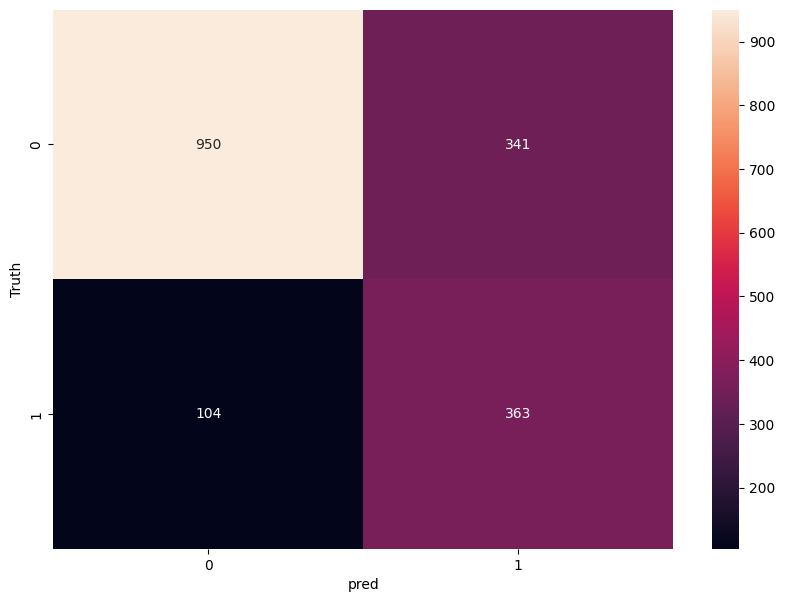

In [195]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [197]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

Mean Squared Error: 0.25312855517633676
Mean Absolute Error: 0.25312855517633676
R-squared: -0.2975848279225142
Accuracy Score: 0.7468714448236633
Confusion Matrix : 
[[950 341]
 [104 363]]
Full report : 
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1291
           1       0.52      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758

